<a href="https://colab.research.google.com/github/adhang/data-science-digitalskola/blob/update/12.%20Intermediate%20Statistics/Homework%20-%20Intermediate%20Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework - Intermediate Statistics
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___
**Contents**
1. Dataset Information
2. Importing Libraries
3. Reading Dataset
4. Dataset Overview
5. Basic EDA

# 1. Dataset Information
This dataset is from Kaggle, you can find it here: [Credit Card Customers](https://www.kaggle.com/sakshigoyal7/credit-card-customers).
<br><br>
This dataset is a sample of credit card customer accounts as of Mar-2013 and the attrition has been defined as customers closing their credit card account within the next 6 months (Apr-2013 - Oct-2013). The sample has a mix of snapshot data as of Mar-2013 and historical data covering past 12 months prior to Mar-2013, including their demographic profile and transaction information. (the original dataset information can be found [here](https://leaps.analyttica.com/sample_cases/9546))
<br><br>
**Attribute Information**
1. `CLIENTNUM` <br>
Client number - Unique identifier for the customer holding the account
2. `Attrition_Flag` <br>
Flag indicative of account closure in next 6 months (between Jan to Jun 2013)
3. `Customer_Age` <br>
Age of the account holder
4. `Gender` <br>
Gender of the account holder
5. `Dependent_count` <br>
Number of people financially dependent on the account holder
6. `Education_Level` <br>
Educational qualification of account holder (ex - high school, college grad etc.)
7. `Marital_Status` <br>
Marital status of account holder (Single, Married, Divorced, Unknown)
8. `Income_Category` <br>
Annual income category of the account holder
9. `Card_Category` <br>
Card type depicting the variants of the cards by value proposition (Blue, Silver and Platinum)
10. `Months_on_book` <br>
Number of months since the account holder opened an an account with the lender
11. `Total_Relationship_Count` <br>
Total number of products held by the customer. Total number of relationships the account holder has with the bank (example - retail bank, mortgage, wealth management etc.)
12. `Months_Inactive_12_mon` <br>
Total number of months inactive in last 12 months
13. `Contacts_Count_12_mon` <br>
Number of Contacts in the last 12 months. No. of times the account holder called to the call center in the past 12 months
14. `Credit_Limit` <br>
Credit limit
15. `Total_Revolving_Bal` <br>
Total amount as revolving balance
16. `Avg_Open_To_Buy` <br>
Open to Buy Credit Line (Average of last 12 months)
17. `Total_Amt_Chng_Q4_Q1` <br>
Change in Transaction Amount (Q4 over Q1)
18. `Total_Trans_Amt` <br>
Total Transaction Amount (Last 12 months)
19. `Total_Trans_Ct` <br>
Total Transaction Count (Last 12 months)
20. `Total_Ct_Chng_Q4_Q1` <br>
Change in Transaction Count (Q4 over Q1)
21. `Avg_Utilization_Ratio` <br>
Average Card Utilization Ratio
22. `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1` <br>
Naive Bayes
23. `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2` <br>
Naive Bayes
<br>

**Note** <br>
Based on the dataset uploader's note, we need to drop the last 2 attributes (naive bayes).
<br>

**Note-2**<br>
The original dataset contains different attributes, such as:
1. Total amount spent by the account holder using the card in Oct-2012 to Mar-2013 (each month becomes different attribute)
2. Total number of times the card was used by the account holder to spend in Oct-2012 to Mar-2013 (each month becomes different attribute)
<br>

I guess, the dataset uploader had changed the dataset or created some derivative attributes from the original dataset. 

# 2. Importing Libraries

In [ ]:
!pip install empiricaldist

In [ ]:
import numpy as np 
import pandas as pd
from empiricaldist import Pmf, Cdf

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rc('patch', edgecolor='black')
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 1.5})

# 3. Reading Dataset

In [ ]:
path = '/content/drive/MyDrive/Digital Skola/Homework/dataset/BankChurners.csv'

data = pd.read_csv(path)
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Dropping Columns
As the dataset uploader had said, we will drop the last 2 columns.

In [ ]:
data = data.iloc[:, :-2]
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Renaming Column Names
Our column names doesn't have both upper-case and lower-case at the same time. I will convert it to lower-case, just to make it more consistent.

In [ ]:
data.columns = data.columns.str.lower()
data.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# 4. Dataset Overview

## Data Types

In [ ]:
data_type = pd.DataFrame(data.dtypes).T.rename({0:'data types'})
data_type

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
data types,int64,object,int64,object,int64,object,object,object,object,int64,int64,int64,int64,float64,int64,float64,float64,int64,int64,float64,float64


## Total Data

In [ ]:
data_count = pd.DataFrame(data.count()).T.rename({0:'total data'})
data_count

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
total data,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127


## Null Values

### Total Null Values

In [ ]:
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total null'})
data_null_total

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
total null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Null Values Percentage

In [ ]:
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage null'})
data_null_percentage

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Info

In [ ]:
data_info = pd.concat([data_type, data_count, data_null_total, data_null_percentage.round(2)], axis=0)
data_info

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
data types,int64,object,int64,object,int64,object,object,object,object,int64,int64,int64,int64,float64,int64,float64,float64,int64,int64,float64,float64
total data,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127
total null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


It's similar to `info()` method, but in different representation.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

## Duplicate Values

In [ ]:
data.duplicated().sum()

0

Our dataset doesn't have any duplicate values. It's a good sign.

# 5. Basic EDA

In [ ]:
data.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Probability Mass Function

In [ ]:
pmf_data = Pmf.from_seq(data['attrition_flag'], normalize=True)
pmf_data = pd.DataFrame({'attrition_flag':pmf_data.index, 'pmf':pmf_data.values})
pmf_data.set_index('attrition_flag').round(3).style.background_gradient(vmin=0, subset='pmf')

,pmf
attrition_flag,
Attrited Customer,0.161000
Existing Customer,0.839000


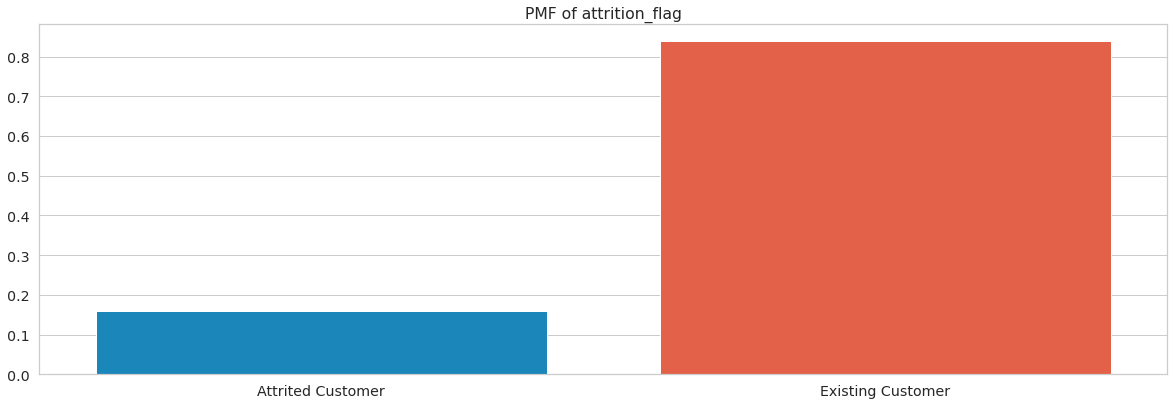

In [ ]:
plt.figure(figsize=(18,6))

ax = sns.barplot(data=pmf_data, x='attrition_flag', y='pmf')

ax.set_title(f'PMF of attrition_flag')
ax.set_xlabel('')
ax.set_ylabel('')
# plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

Using PMF, we can see that `Existing Customer` data is much more than `Attrited Customer`.

## Filtering Data
I will filter the original data to create 2 new dataframes:
- `exist_customer` - contains data where the customer still exists
- `attrited_customer` - contains data where the customer has been attrited

In [ ]:
exist_customer = data[data['attrition_flag'] == 'Existing Customer']
exist_customer.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
attrited_customer = data[data['attrition_flag'] == 'Attrited Customer']
attrited_customer.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,5,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,2,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,1,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,2,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000


## Data Distribution
I will analyze the data distribution for the `total_trans_amt` and `total_trans_ct` attributes in both the overall data and the filtered data (based on the `attrition_flag`).

### Histogram

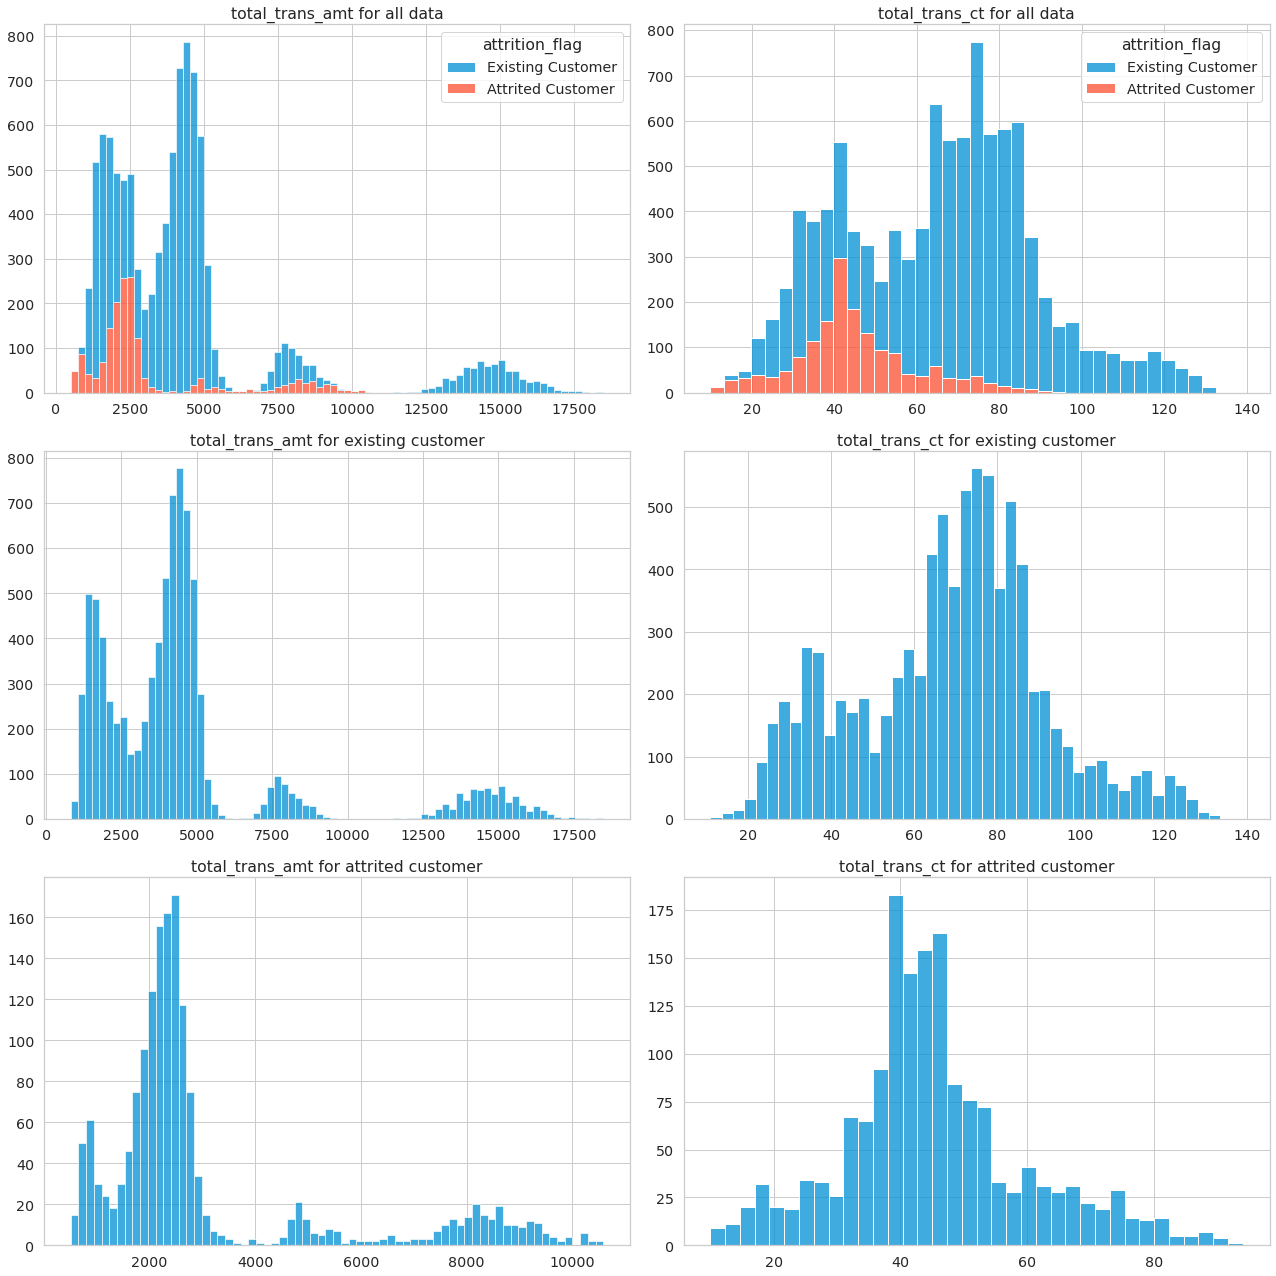

In [ ]:
column_list = ['total_trans_amt', 'total_trans_ct']

fig, ax = plt.subplots(3, 2, figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

# overall customer
for i, col in enumerate(column_list):
  x = i
  sns.histplot(data=data, x=col, hue='attrition_flag', multiple='stack', ax=axes_list[x])
  axes_list[x].set_title(f'{col} for all data')
  axes_list[x].set_xlabel('')
  axes_list[x].set_ylabel('')

# existing customer
for i, col in enumerate(column_list):
  x = i + 2
  sns.histplot(data=exist_customer, x=col, ax=axes_list[x])
  axes_list[x].set_title(f'{col} for existing customer')
  axes_list[x].set_xlabel('')
  axes_list[x].set_ylabel('')

# attrited customer
for i, col in enumerate(column_list):
  x = i + 4
  sns.histplot(data=attrited_customer, x=col, ax=axes_list[x])
  axes_list[x].set_title(f'{col} for attrited customer')
  axes_list[x].set_xlabel('')
  axes_list[x].set_ylabel('')

plt.tight_layout()
plt.show()

### Density

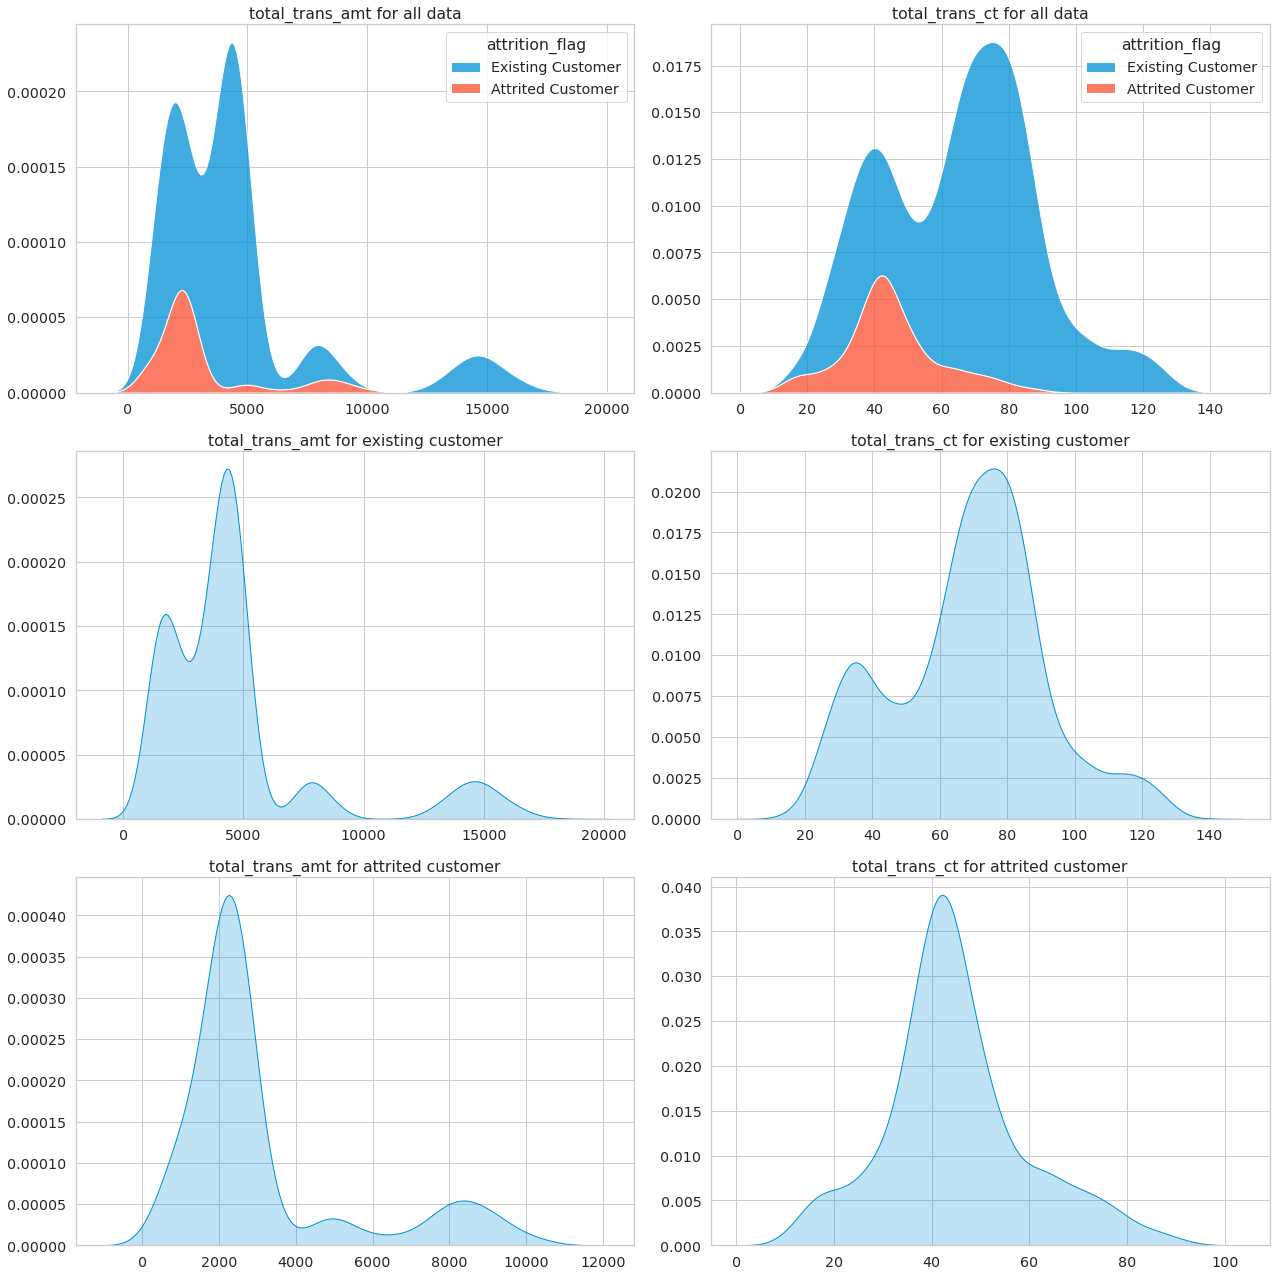

In [ ]:
column_list = ['total_trans_amt', 'total_trans_ct']

fig, ax = plt.subplots(3, 2, figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

# overall customer
for i, col in enumerate(column_list):
  x = i
  sns.kdeplot(data=data, x=col, hue='attrition_flag', multiple='stack', fill=True, ax=axes_list[x])
  axes_list[x].set_title(f'{col} for all data')
  axes_list[x].set_xlabel('')
  axes_list[x].set_ylabel('')

# existing customer
for i, col in enumerate(column_list):
  x = i + 2
  sns.kdeplot(data=exist_customer, x=col, fill=True, ax=axes_list[x])
  axes_list[x].set_title(f'{col} for existing customer')
  axes_list[x].set_xlabel('')
  axes_list[x].set_ylabel('')

# attrited customer
for i, col in enumerate(column_list):
  x = i + 4
  sns.kdeplot(data=attrited_customer, x=col, fill=True, ax=axes_list[x])
  axes_list[x].set_title(f'{col} for attrited customer')
  axes_list[x].set_xlabel('')
  axes_list[x].set_ylabel('')

plt.tight_layout()
plt.show()

### Histogram + Stats Number

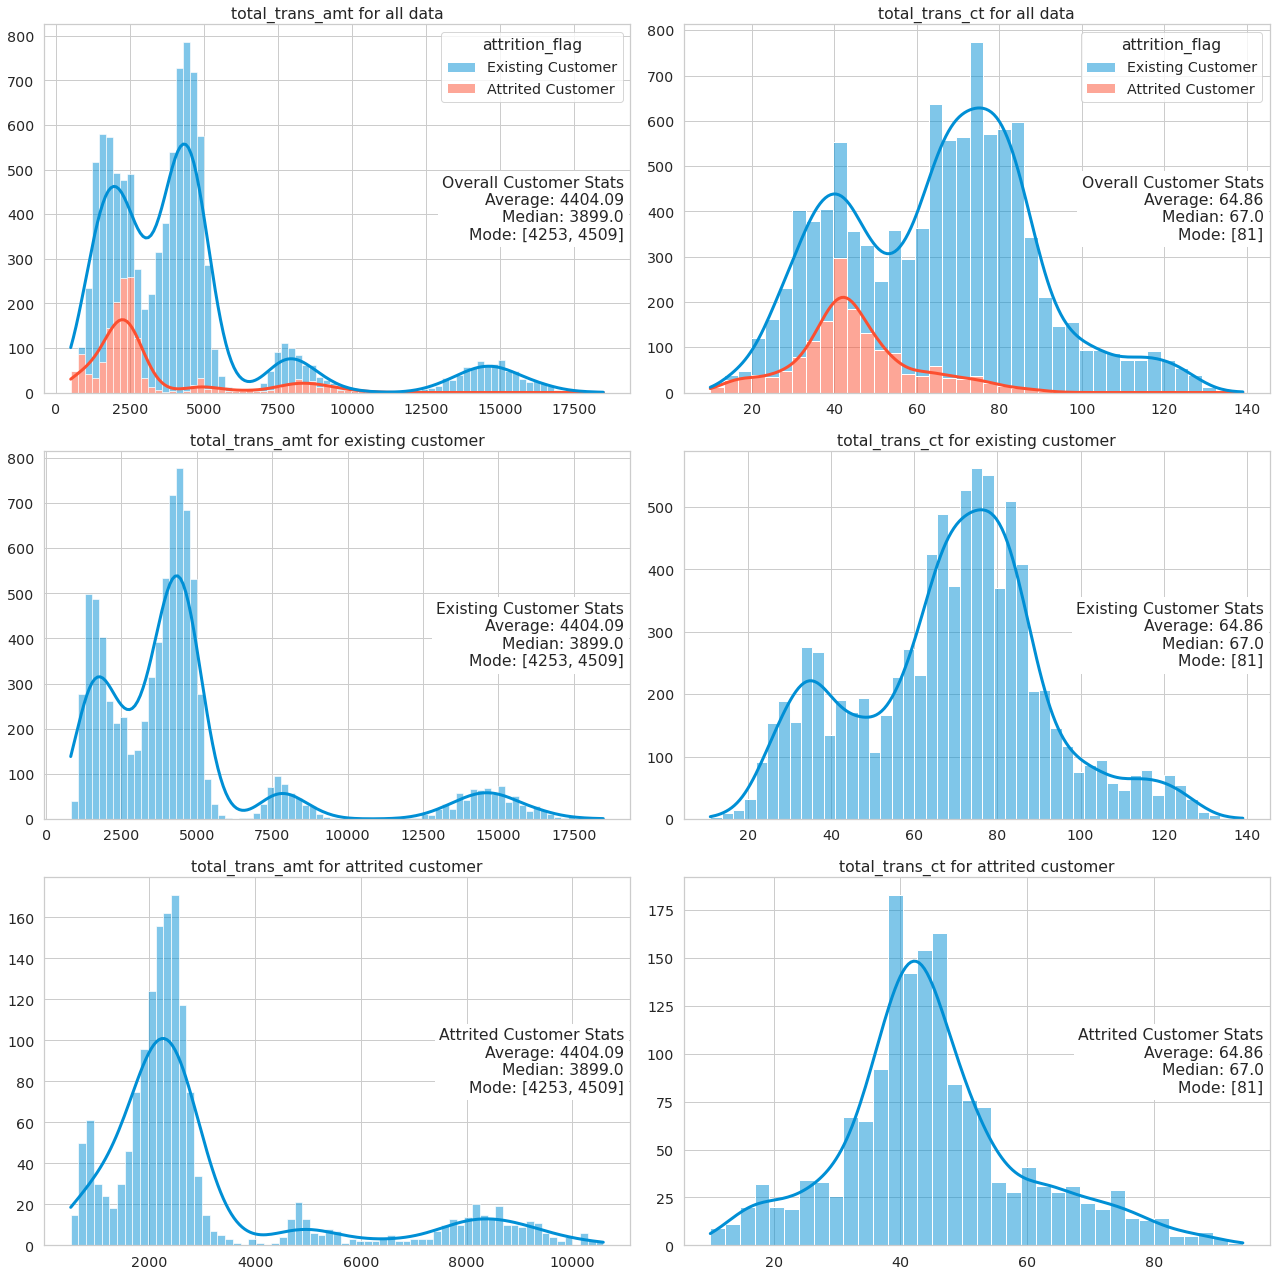

In [ ]:
column_list = ['total_trans_amt', 'total_trans_ct']

fig, ax = plt.subplots(3, 2, figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_list):
  x = i
  sns.histplot(data=data, x=col, hue='attrition_flag', multiple='stack', kde=True, line_kws={'linewidth':3}, ax=axes_list[x])
  axes_list[x].set_title(f'{col} for all data')
  axes_list[x].set_xlabel('')
  axes_list[x].set_ylabel('')

  average = data[col].mean()
  median = data[col].median()
  mode = data[col].mode()

  text_avg = f'Average: {round(average,2)}'
  text_median = f'Median: {median}'
  text_mode = f'Mode: {[val for val in mode]}'

  text_all = f'Overall Customer Stats\n{text_avg}\n{text_median}\n{text_mode}'

  axes_list[x].text(0.99, 0.5,text_all,
                    horizontalalignment='right',
                    verticalalignment='center',
                    fontsize='medium',
                    backgroundcolor='white',
                    transform = axes_list[x].transAxes)

for i, col in enumerate(column_list):
  x = i + 2
  sns.histplot(data=exist_customer, x=col, kde=True, line_kws={'linewidth':3}, ax=axes_list[x])
  axes_list[x].set_title(f'{col} for existing customer')
  axes_list[x].set_xlabel('')
  axes_list[x].set_ylabel('')

  average = data[col].mean()
  median = data[col].median()
  mode = data[col].mode()

  text_avg = f'Average: {round(average,2)}'
  text_median = f'Median: {median}'
  text_mode = f'Mode: {[val for val in mode]}'

  text_all = f'Existing Customer Stats\n{text_avg}\n{text_median}\n{text_mode}'

  axes_list[x].text(0.99, 0.5,text_all,
                    horizontalalignment='right',
                    verticalalignment='center',
                    fontsize='medium',
                    backgroundcolor='white',
                    transform = axes_list[x].transAxes)

for i, col in enumerate(column_list):
  x = i + 4
  sns.histplot(data=attrited_customer, x=col, kde=True, line_kws={'linewidth':3}, ax=axes_list[x])
  axes_list[x].set_title(f'{col} for attrited customer')
  axes_list[x].set_xlabel('')
  axes_list[x].set_ylabel('')

  average = data[col].mean()
  median = data[col].median()
  mode = data[col].mode()

  text_avg = f'Average: {round(average,2)}'
  text_median = f'Median: {median}'
  text_mode = f'Mode: {[val for val in mode]}'

  text_all = f'Attrited Customer Stats\n{text_avg}\n{text_median}\n{text_mode}'

  axes_list[x].text(0.99, 0.5,text_all,
                    horizontalalignment='right',
                    verticalalignment='center',
                    fontsize='medium',
                    backgroundcolor='white',
                    transform = axes_list[x].transAxes)

plt.tight_layout()
plt.show()

### Skewness
From the histogram and density plot above, we can see some of the attributes are skewed to the right. But, I will calculate the skewness value because sometimes the skewness is not really clear. I just want to make sure.

In [ ]:
overall_skew = data[['total_trans_amt', 'total_trans_ct']].skew()
overall_skew = pd.DataFrame(overall_skew).T.rename({0:'all data skewness'})
overall_skew

,total_trans_amt,total_trans_ct
all data skewness,2.041003,0.153673


In [ ]:
exist_skew = exist_customer[['total_trans_amt', 'total_trans_ct']].skew()
exist_skew = pd.DataFrame(exist_skew).T.rename({0:'exist customer skewness'})
exist_skew

,total_trans_amt,total_trans_ct
exist customer skewness,1.995948,-0.003642


In [ ]:
attrited_skew = attrited_customer[['total_trans_amt', 'total_trans_ct']].skew()
attrited_skew = pd.DataFrame(attrited_skew).T.rename({0:'attrited customer skewness'})
attrited_skew

,total_trans_amt,total_trans_ct
attrited customer skewness,1.685336,0.485945


In [ ]:
skewness = pd.concat([overall_skew, exist_skew, attrited_skew], axis=0)

skewness.style.background_gradient()

,total_trans_amt,total_trans_ct
all data skewness,2.041003,0.153673
exist customer skewness,1.995948,-0.003642
attrited customer skewness,1.685336,0.485945


From this table, we can see that most of the attributes are skewed to the right. However, the `total_trans_ct` attribute for existing customers is not skewed too much (just slightly skewed to the left) because the skewness value is close to zero.
<br><br>
For now, I'm not going to do any transformation (to handle this skewed data). But, in case you are curious about how to handle skewed data, here are some methods for handling skewed data:
- Log transform
- Squared root transform
- Box-cox transform

## Correlation
I will analyze the correlation for the `total_trans_amt` and `total_trans_ct` attributes in both the overall data and the filtered data (based on the `attrition_flag`).

### Scatter Plot

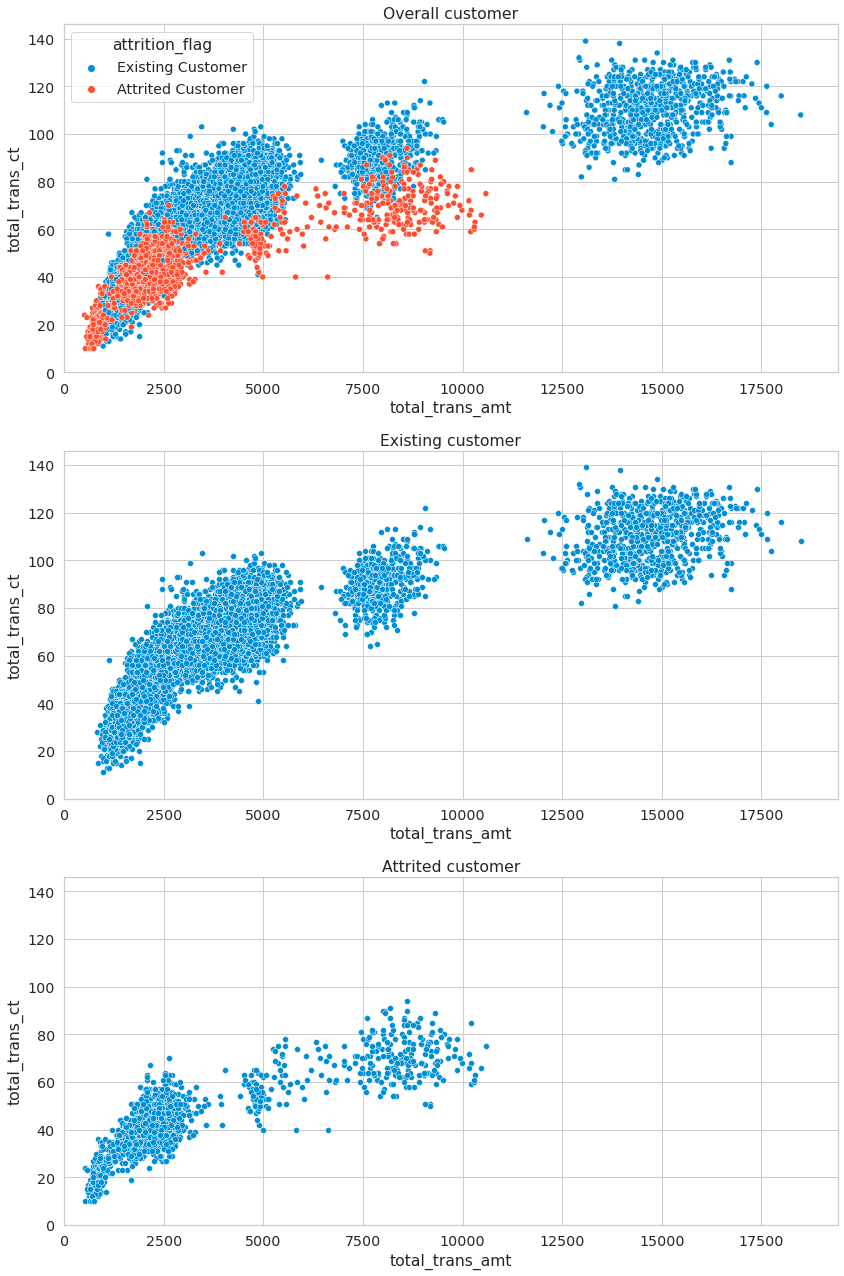

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(12,18))

x_max = data['total_trans_amt'].max() + (0.05 * data['total_trans_amt'].max())
y_max = data['total_trans_ct'].max() + (0.05 * data['total_trans_ct'].max())

# overall customer
sns.scatterplot(data=data, x='total_trans_amt', y='total_trans_ct', hue='attrition_flag', ax=ax[0])
ax[0].set_title('Overall customer')
ax[0].set_xlim([0, x_max])
ax[0].set_ylim([0, y_max])

# existing customer
sns.scatterplot(data=exist_customer, x='total_trans_amt', y='total_trans_ct', ax=ax[1])
ax[1].set_title('Existing customer')
ax[1].set_xlim([0, x_max])
ax[1].set_ylim([0, y_max])

# attrited customer
sns.scatterplot(data=attrited_customer, x='total_trans_amt', y='total_trans_ct', ax=ax[2])
ax[2].set_title('Attrited customer')
ax[2].set_xlim([0, x_max])
ax[2].set_ylim([0, y_max])

plt.tight_layout()
plt.show()

From this scatter plot, we can clearly see that the `total_trans_amt` and `total_trans_ct` attributes have a positive correlation in both the overall data and the filtered data.

### Contour Plot
Using scatter plot, our data most likely to be overplotting. To avoid that, we can use contour plot.

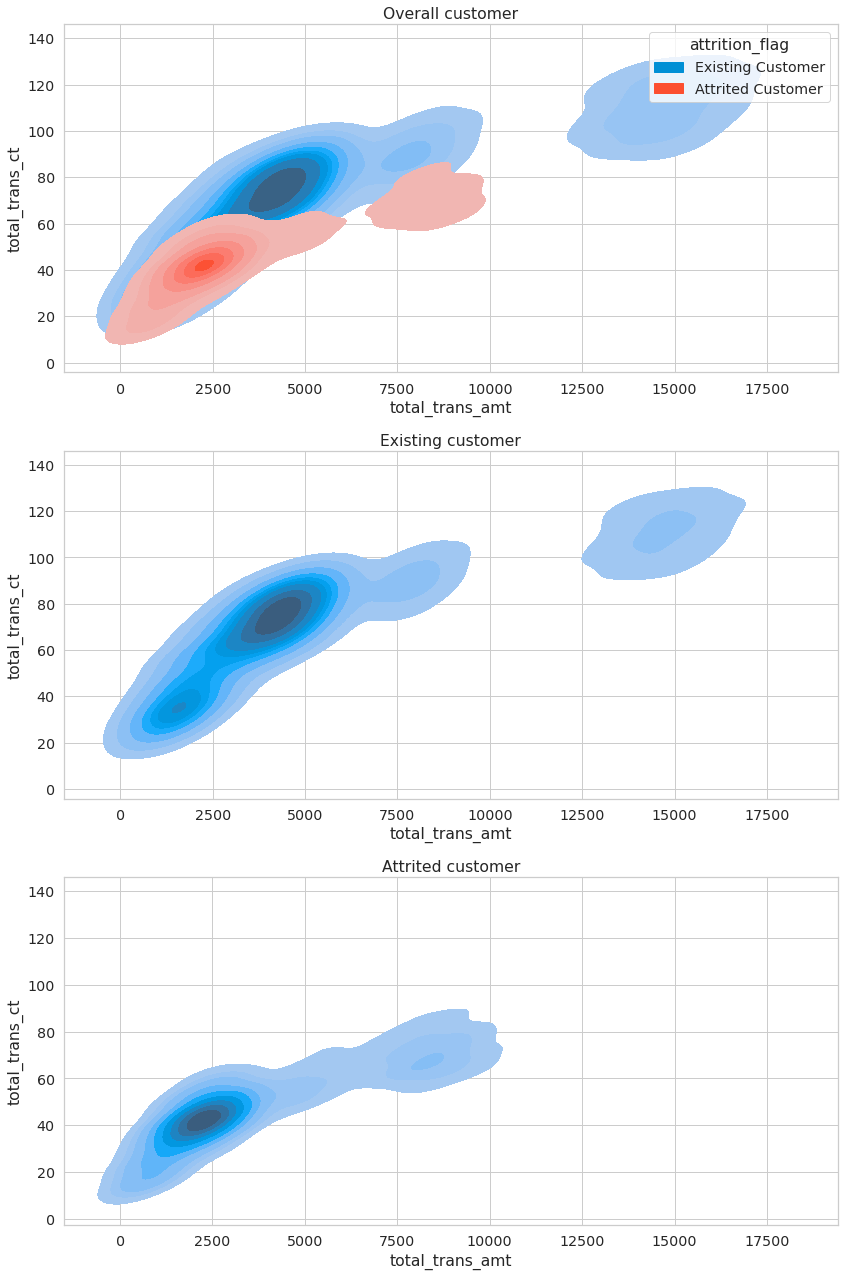

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(12,18))

x_max = data['total_trans_amt'].max() + (0.05 * data['total_trans_amt'].max())
y_max = data['total_trans_ct'].max() + (0.05 * data['total_trans_ct'].max())

# overall customer
sns.kdeplot(data=data, x='total_trans_amt', y='total_trans_ct', hue='attrition_flag', fill=True, ax=ax[0])
ax[0].set_title('Overall customer')
ax[0].set_xlim([None, x_max])
ax[0].set_ylim([None, y_max])

# existing customer
sns.kdeplot(data=exist_customer, x='total_trans_amt', y='total_trans_ct', fill=True, ax=ax[1])
ax[1].set_title('Existing customer')
ax[1].set_xlim([None, x_max])
ax[1].set_ylim([None, y_max])

# attrited customer
sns.kdeplot(data=attrited_customer, x='total_trans_amt', y='total_trans_ct', fill=True, ax=ax[2])
ax[2].set_title('Attrited customer')
ax[2].set_xlim([None, x_max])
ax[2].set_ylim([None, y_max])

plt.tight_layout()
plt.show()

### Heatmap
Heatmap is useful to see the correlation value between each attribute.

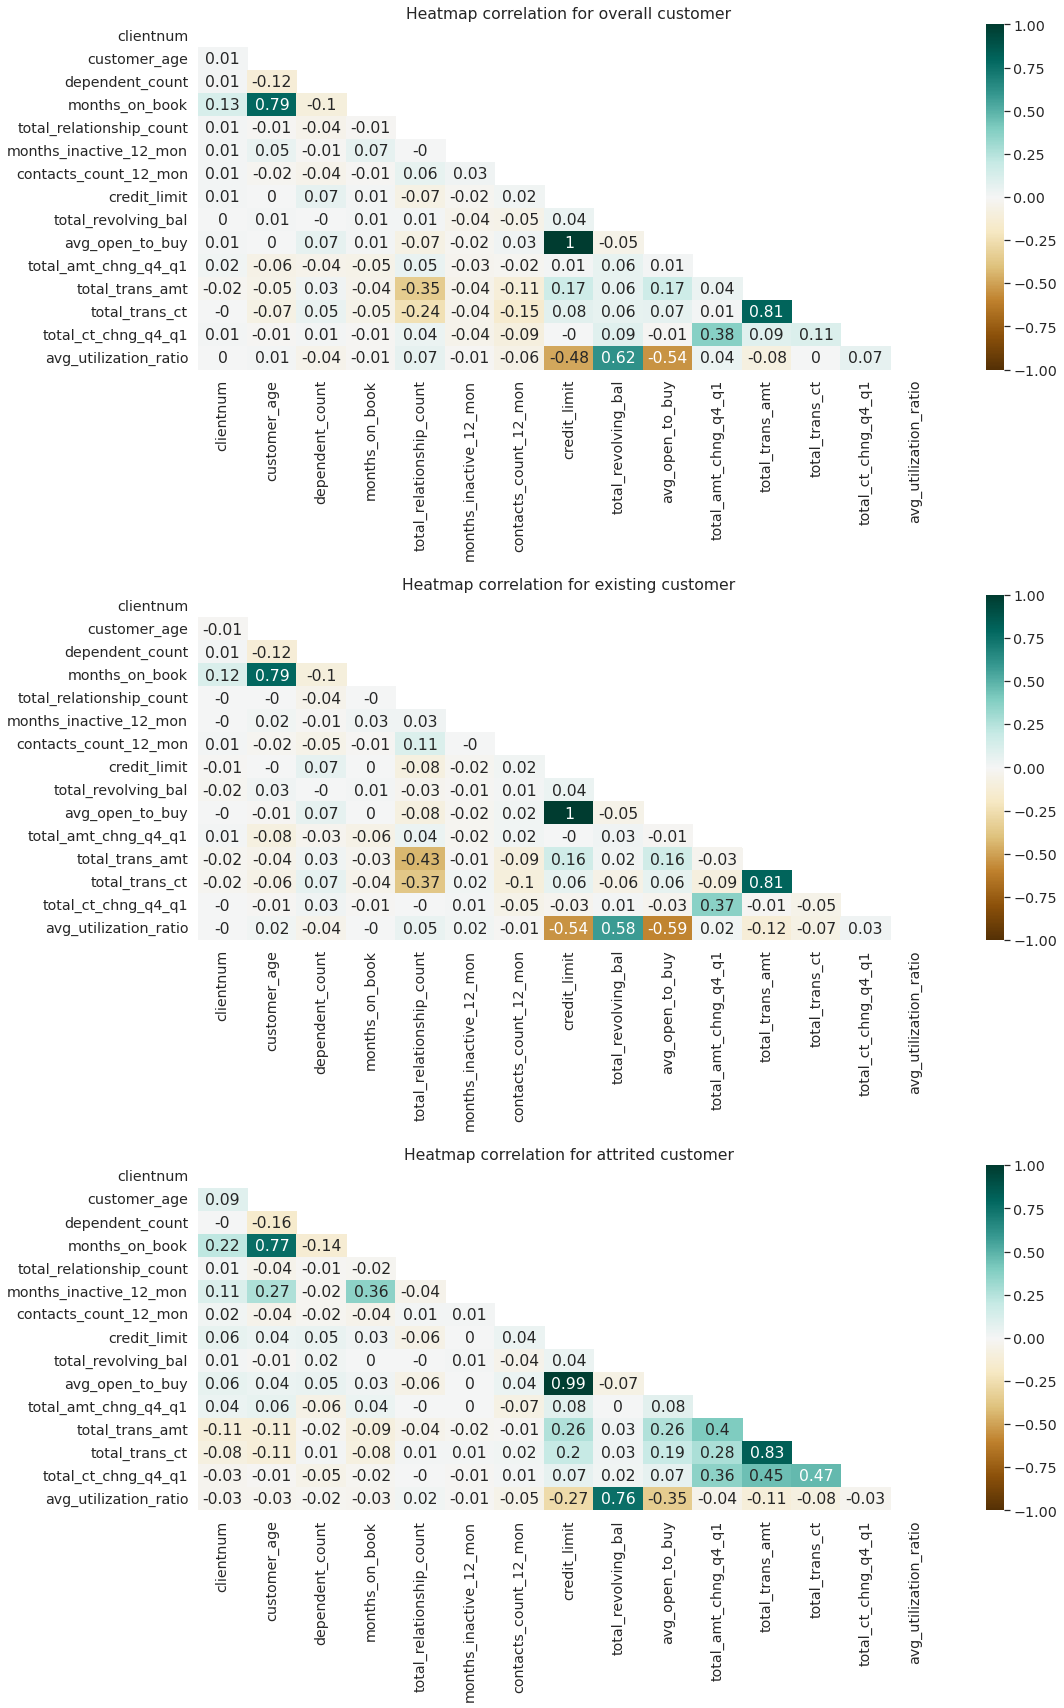

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(16,24))

# overall customer
corr_matrix = data.corr().round(2)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG', ax=ax[0])
ax[0].set_title('Heatmap correlation for overall customer')

# existing customer
corr_matrix = exist_customer.corr().round(2)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG', ax=ax[1])
ax[1].set_title('Heatmap correlation for existing customer')

# attrited customer
corr_matrix = attrited_customer.corr().round(2)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG', ax=ax[2])
ax[2].set_title('Heatmap correlation for attrited customer')

plt.tight_layout()
plt.show()

From this heatmap, we can see that the `total_trans_amt` attribute is highly correlated (positively) with the `total_trans_ct` attribute in both the overall data and the filtered data.